# Imports

In [353]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Data

In [354]:
df = pd.read_csv("Placement_Data_Full_Class.csv")

# Exploratory Data Analysis

In [355]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
sl_no             215 non-null int64
gender            215 non-null object
ssc_p             215 non-null float64
ssc_b             215 non-null object
hsc_p             215 non-null float64
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
specialisation    215 non-null object
mba_p             215 non-null float64
status            215 non-null object
salary            148 non-null float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [357]:
categorical = ["gender","ssc_b","hsc_b","hsc_s","degree_t","workex","specialisation","status"]
numerical = ["ssc_p","hsc_p","degree_p","etest_p","mba_p","salary"]

In [358]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [359]:
for feature in categorical:
    print(df[feature].unique())

['M' 'F']
['Others' 'Central']
['Others' 'Central']
['Commerce' 'Science' 'Arts']
['Sci&Tech' 'Comm&Mgmt' 'Others']
['No' 'Yes']
['Mkt&HR' 'Mkt&Fin']
['Placed' 'Not Placed']


In [360]:
df = df.drop("sl_no",axis=1)

**Which categorical features affect placements?**

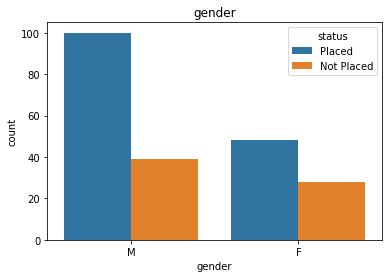

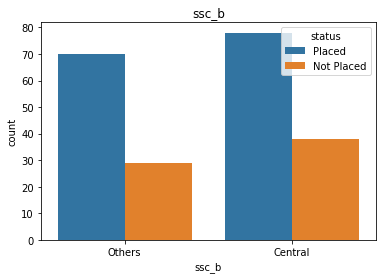

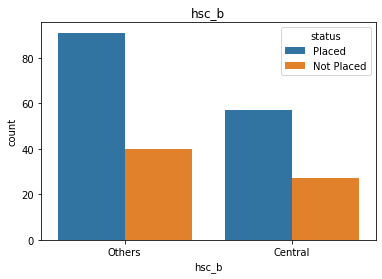

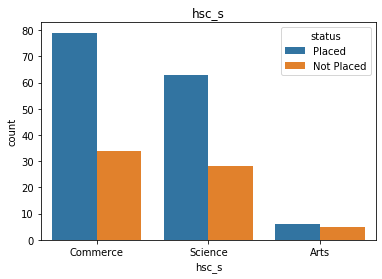

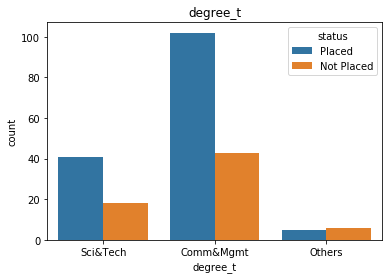

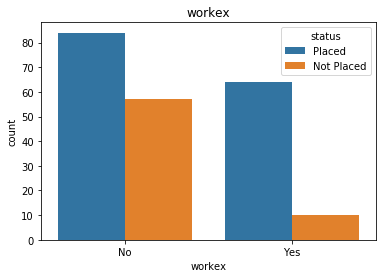

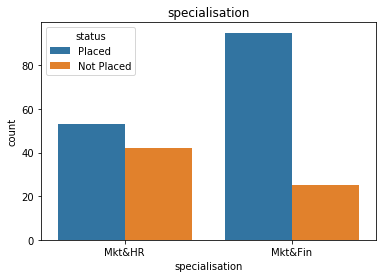

In [361]:
for feature in categorical[:-1]:
    sns.countplot(feature, hue="status", data=df)
    plt.title(feature)
    plt.show()

**Relantionship between numerical features**

In [362]:
df.status.unique()

array(['Placed', 'Not Placed'], dtype=object)

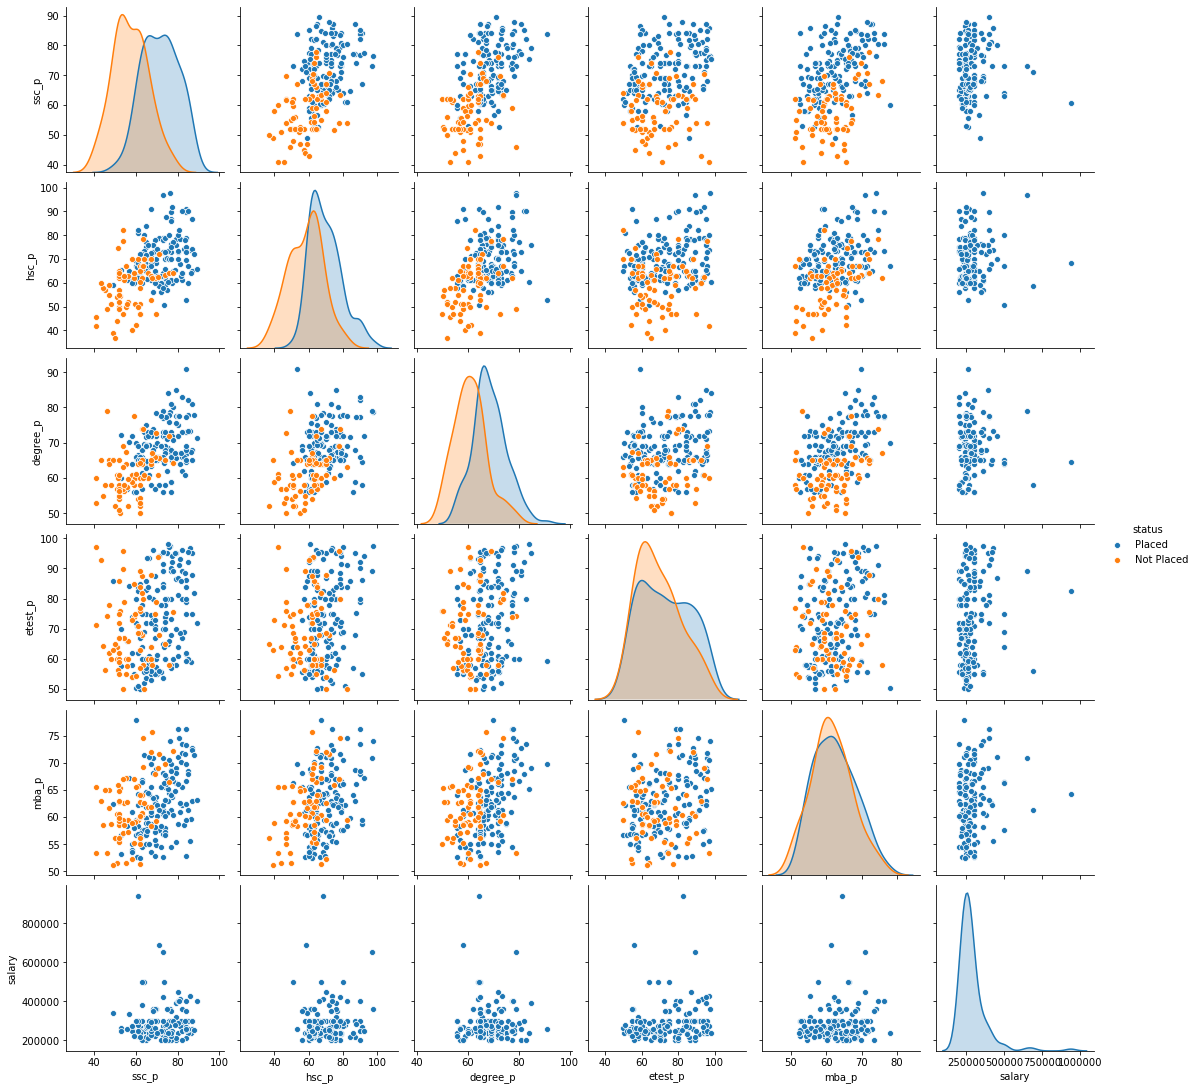

In [363]:
sns.pairplot(df, hue="status")

It seems to be an outlier at salary>800000

In [364]:
df[df.salary > 800000]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
119,M,60.8,Central,68.4,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0


In [365]:
df = df[df.index != 119]

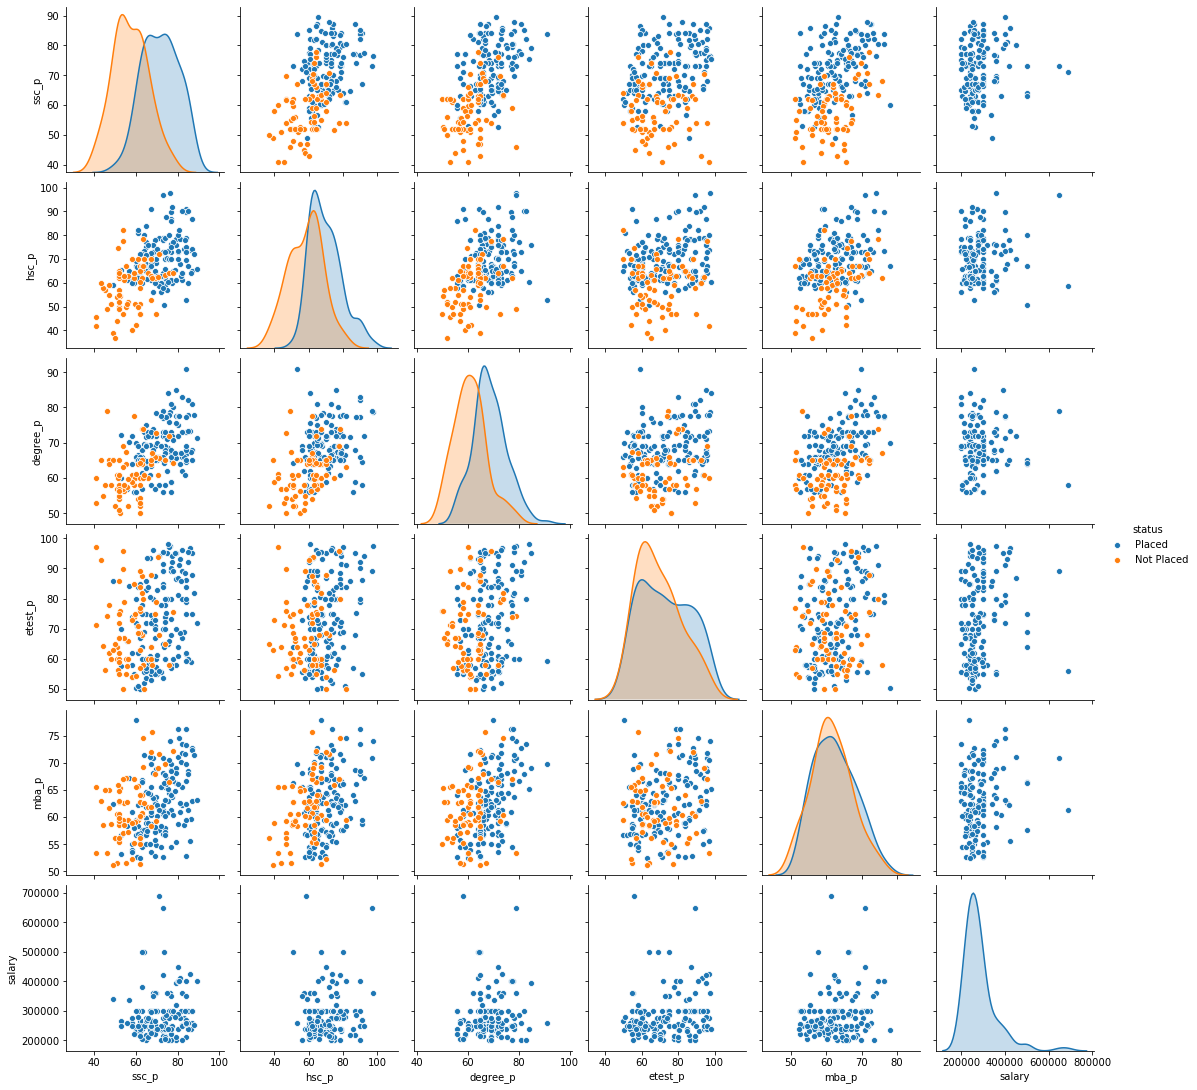

In [366]:
sns.pairplot(df, hue="status")

Depen on the education grade, marks are more or less relevant.

In [367]:
df[df.salary > 600000]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
150,M,71.0,Central,58.66,Central,Science,58.0,Sci&Tech,Yes,56.0,Mkt&Fin,61.30,Placed,690000.0
177,F,73.0,Central,97.00,Others,Commerce,79.0,Comm&Mgmt,Yes,89.0,Mkt&Fin,70.81,Placed,650000.0


For the two cases with salary higher than 600000 we can see his notes are not the best, but as the diference is not too big and they are only 2 samples, I decided to include them inside the dataframe. 

Most correlated variables

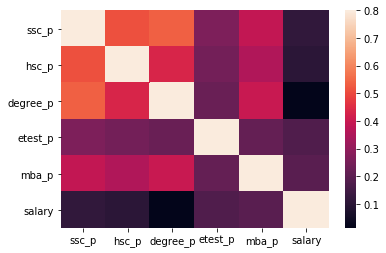

In [368]:
sns.heatmap(df.corr(), vmax=.8)

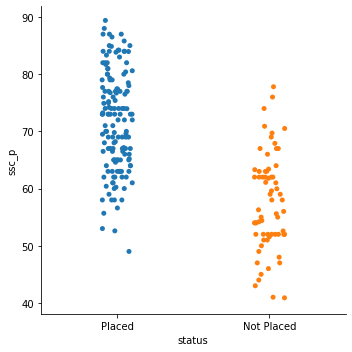

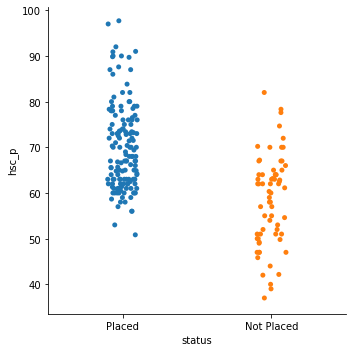

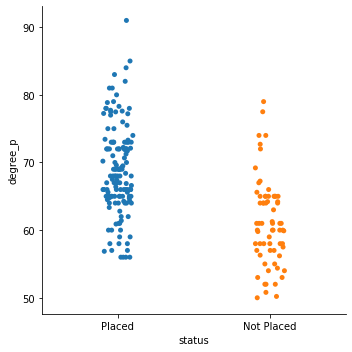

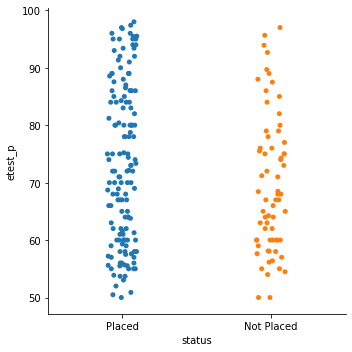

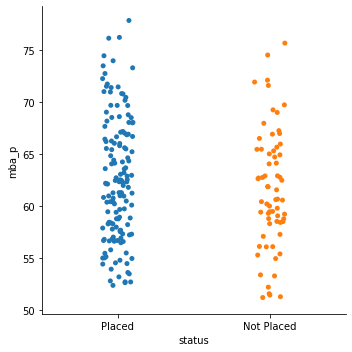

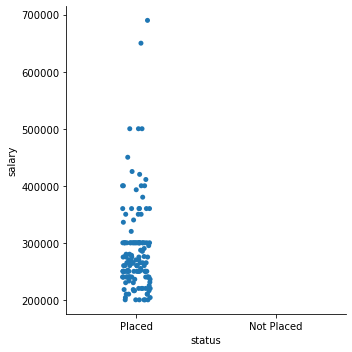

In [369]:
for feature in numerical:
    sns.catplot(x="status",y=feature,data=df)    

As said before, in some cases, good grades are not correlated with getting placed. *etest_p* is a good example

# Categorical to numerical 

In [432]:
def one_hot_encoding(df,feature):
    dummy = pd.get_dummies(df[feature])
    # Avoid dummy variable trap (too much correlation between the resultant variables)
    dummy = dummy.drop(dummy.columns[-1],axis=1)
    df = pd.concat([df,dummy],axis=1)
    return df

In [371]:
categorical[:-2]

['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex']

In [372]:
for feature in categorical[:-2]:
    df = one_hot_encoding(df,feature)

In [373]:
df.columns = ['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary', 'F', 'Central_s', 'Central_h', 'Arts', 'Commerce', 'Comm&Mgmt',
       'Others', 'No']

In [374]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary', 'F', 'Central_s', 'Central_h', 'Arts', 'Commerce',
       'Comm&Mgmt', 'Others', 'No'],
      dtype='object')

In [375]:
df = df.drop(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',"specialisation"],axis=1)

In [376]:
df.columns

Index(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'status', 'salary',
       'F', 'Central_s', 'Central_h', 'Arts', 'Commerce', 'Comm&Mgmt',
       'Others', 'No'],
      dtype='object')

# Model selection and hyperparameters

Since all the people with salary has a job, it is better to drop it as it can overfit the model.

In [377]:
df = df.drop("salary",axis=1)

Define target and variables:

In [378]:
X = df.drop("status",axis=1)
y = df["status"]

Status is given as string and it is needed as a number.

In [379]:
status_mapping = {"Placed":1, "Not Placed":0}
y = y.map(status_mapping)

### Models to try:
Decision Trees fit better this kind of data, so:
- Logistic Regresion
- Random Forest
- Extremely randomised trees
- MLP
- XGBoost

Hypertunning with a grid search

In [237]:
from sklearn.model_selection import GridSearchCV

**Logistic Regresion**

Best params: {'eta0': 0.0001, 'learning_rate': 'adaptive', 'loss': 'huber', 'max_iter': 2500, 'penalty': 'elasticnet'}

In [243]:
from sklearn.linear_model import SGDClassifier

param_grid = {"loss":["hinge","log","squared_loss","huber","epsilon_insensitive"],
             "penalty":["l2","l1","elasticnet"],"max_iter":[500,1000,1500,2000,2500,3000,5000,7000],
             "learning_rate":["optimal","constant","adaptive","invscaling"],
             "eta0":[0.00001,0.0001,0.005,0.1]}

clf = SGDClassifier()

grid_search_sgd = GridSearchCV(clf, param_grid, scoring="roc_auc", cv=5, return_train_score = True)

grid_search_sgd.fit(X,y)

print("Best params:",grid_search_sgd.best_params_)
print("Score:",grid_search_sgd.best_score_)

c:\users\grego\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
c:\users\grego\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
c:\users\grego\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
c:\users\grego\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before converge

Best params: {'eta0': 0.0001, 'learning_rate': 'adaptive', 'loss': 'huber', 'max_iter': 2500, 'penalty': 'elasticnet'}
Score: 0.9257723885310092


**RandomForest**

Best params: {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 100, 'random_state': 42}

In [244]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {"n_estimators":[50,100,300,500,1000,1500],"criterion":["gini","entropy"],
             "max_features":["auto","sqrt","log2"],"random_state":[42],
              "class_weight":["balanced","balanced_subsample",None]}

clf = RandomForestClassifier()

grid_search_rf = GridSearchCV(clf, param_grid, scoring="roc_auc", cv=5, return_train_score = True)

grid_search_rf.fit(X,y)

print("Best params:",grid_search_rf.best_params_)
print("Score:",grid_search_rf.best_score_)

Best params: {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 100, 'random_state': 42}
Score: 0.9243362384741696


**Extremely Randomised Trees**

Best params: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 500, 'random_state': 42}

In [246]:
from sklearn.ensemble import ExtraTreesClassifier

param_grid = {"n_estimators":[50,100,300,500,1000,1500],"criterion":["gini","entropy"],
             "max_features":["auto","sqrt","log2"],"random_state":[42],
              "class_weight":["balanced","balanced_subsample",None]}

clf = ExtraTreesClassifier()

grid_search_ert = GridSearchCV(clf, param_grid, scoring="roc_auc", cv=5, return_train_score = True)

grid_search_ert.fit(X,y)

print("Best params:",grid_search_ert.best_params_)
print("Score:",grid_search_ert.best_score_)

Best params: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 500, 'random_state': 42}
Score: 0.9162220538082607


**MLP**

Best params: {'activation': 'identity', 'alpha': 1e-05, 'learning_rate': 'constant', 'random_state': 42, 'solver': 'lbfgs'}

In [247]:
from sklearn.neural_network import MLPClassifier

param_grid = {"solver":["lbfgs","adam"],"learning_rate":["constant","invscaling","adaptative"],
              "random_state":[42],"activation":["identity","logistic","tanh","relu"],
             "alpha":[0.00001,0.0005,]}

mlp_clf = MLPClassifier()

grid_search_mlp = GridSearchCV(mlp_clf, param_grid, scoring="roc_auc", cv=5, return_train_score = True)

grid_search_mlp.fit(X,y)

print("Best params:",grid_search_mlp.best_params_)
print("Score:",grid_search_mlp.best_score_)

c:\users\grego\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\grego\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\grego\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.

c:\users\grego\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\grego\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\grego\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.

c:\users\grego\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\grego\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\grego\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.

c:\users\grego\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\grego\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\grego\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.

c:\users\grego\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\grego\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\grego\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.

c:\users\grego\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\grego\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\grego\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.

c:\users\grego\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\grego\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\grego\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.

c:\users\grego\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\grego\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\grego\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWa

Best params: {'activation': 'identity', 'alpha': 1e-05, 'learning_rate': 'constant', 'random_state': 42, 'solver': 'lbfgs'}
Score: 0.9364835164835166


c:\users\grego\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


**Xtreeme Gradient Boosting**

Best params: {'grow_policy': 'depthwise', 'predictor': 'cpu_predictor', 'random_state': 42, 'sampling_method': 'uniform', 'tree_method': 'gpu_hist'}

In [248]:
from xgboost import XGBClassifier

param_grid = {"random_state":[42],"sampling_method":["uniform","gradient_based"],
             "tree_method":["auto","exact","approx","hist","gpu_hist"],
             "grow_policy":['depthwise', 'lossguide'],
             "predictor":["auto","cpu_predictor","gpu_predictor"]}

clf = XGBClassifier()

grid_search_xgb = GridSearchCV(clf, param_grid, scoring="roc_auc", cv=5, return_train_score = True)

grid_search_xgb.fit(X,y)

print("Best params:",grid_search_xgb.best_params_)
print("Score:",grid_search_xgb.best_score_)

c:\users\grego\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\grego\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\grego\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "c:\users\grego\appdata\local\programs\python\python37\lib\site-packages\xgboost\training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "c:\users\grego\appdata\local\programs\python\python37\lib\site-packages\xgboost\training.py", line 74, in _train_internal
    bst.update(dtrain, i, obj)
  File "c:\users\grego\appdata\local\programs\pyt

Best params: {'grow_policy': 'depthwise', 'predictor': 'cpu_predictor', 'random_state': 42, 'sampling_method': 'uniform', 'tree_method': 'gpu_hist'}
Score: 0.9183124921055956


# Validation

Missing Data

In [380]:
X["target"] = y

In [381]:
X.isnull().sum()

ssc_p        0
hsc_p        0
degree_p     0
etest_p      0
mba_p        0
F            0
Central_s    0
Central_h    0
Arts         0
Commerce     0
Comm&Mgmt    0
Others       0
No           0
target       0
dtype: int64

In [382]:
X.dropna(inplace=True)
X.reset_index(inplace=True)

In [387]:
from sklearn.model_selection import StratifiedKFold

X["kfold"] = -1
y_ = X.target.values
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
idx = kf.get_n_splits(X=df,y=y)
print(idx)
for fold,(x,y_) in enumerate(kf.split(X=df,y=y_)):
    X.loc[y_,'kfold'] = fold

5


In [388]:
X.kfold.unique()

array([4, 1, 0, 3, 2], dtype=int64)

In [417]:
from sklearn.metrics import roc_auc_score

def train(clf, fold):
    train_df = X[X.kfold != fold]
    valid_df = X[X.kfold == fold]
    train_X = train_df[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p',
       'F', 'Central_s', 'Central_h', 'Arts', 'Commerce', 'Comm&Mgmt',
       'Others', 'No']]
    train_y = train_df["target"]
    valid_X = valid_df[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p',
       'F', 'Central_s', 'Central_h', 'Arts', 'Commerce', 'Comm&Mgmt',
       'Others', 'No']]
    valid_y = valid_df["target"]
    
    clf.fit(train_X, train_y)
    
    preds = clf.predict(valid_X)
    
    print("Fold:{} -- Roc AUC Score: {}".format(fold, roc_auc_score(valid_y, preds)))
    
    return clf       

**XGBoost**

In [418]:
xgb_clf = XGBClassifier(random_state=42,n_estimators = 1000, 
                        learning_rate=0.01,min_child_weight=5,grow_policy="depthwise",
                       predictor="cpu_predictor",sampling_method="uniform", three_metod="gpu_hist")
train(xgb_clf,0)
train(xgb_clf,1)
best_xgb = train(xgb_clf,2)
train(xgb_clf,3)
_ = train(xgb_clf,4)

Fold:0 -- Roc AUC Score: 0.7743589743589744
Fold:1 -- Roc AUC Score: 0.8128205128205128
Fold:2 -- Roc AUC Score: 0.9310344827586207
Fold:3 -- Roc AUC Score: 0.7684729064039408
Fold:4 -- Roc AUC Score: 0.8289124668435014


**Random Forest**

In [419]:
rf_clf = RandomForestClassifier(class_weight="balanced_subsample",criterion="gini",max_features="auto",
                               n_estimators=100,random_state=42)

train(rf_clf,0)
best_rf = train(rf_clf,1)
train(rf_clf,2)
train(rf_clf,3)
_ = train(rf_clf,4)

Fold:0 -- Roc AUC Score: 0.7576923076923078
Fold:1 -- Roc AUC Score: 0.8846153846153846
Fold:2 -- Roc AUC Score: 0.8583743842364532
Fold:3 -- Roc AUC Score: 0.7684729064039408
Fold:4 -- Roc AUC Score: 0.790450928381963


**MLP**

In [420]:
mlp_clf = MLPClassifier(activation="identity", alpha=1e-05,learning_rate="constant",
                       solver="lbfgs",random_state=42)

train(mlp_clf,0)
train(mlp_clf,1)
best_mlp = train(mlp_clf,2)
train(mlp_clf,3)
_ = train(mlp_clf,4)

c:\users\grego\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\grego\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Fold:0 -- Roc AUC Score: 0.8012820512820513
Fold:1 -- Roc AUC Score: 0.7358974358974358


c:\users\grego\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Fold:2 -- Roc AUC Score: 0.9655172413793103


c:\users\grego\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\grego\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Fold:3 -- Roc AUC Score: 0.8226600985221674
Fold:4 -- Roc AUC Score: 0.8116710875331564


**Logistic Regresion**

In [421]:
sgd_clf = SGDClassifier(eta0=0.0001,learning_rate="adaptive",loss="huber",max_iter=2500, penalty="elasticnet")

train(sgd_clf,0)
train(sgd_clf,1)
train(sgd_clf,2)
train(sgd_clf,3)
train(sgd_clf,4)

Fold:0 -- Roc AUC Score: 0.5384615384615384
Fold:1 -- Roc AUC Score: 0.5384615384615384
Fold:2 -- Roc AUC Score: 0.5
Fold:3 -- Roc AUC Score: 0.5
Fold:4 -- Roc AUC Score: 0.5384615384615384


SGDClassifier(eta0=0.0001, learning_rate='adaptive', loss='huber',
              max_iter=2500, penalty='elasticnet')

In [422]:
sgd_clf = SGDClassifier()

train(sgd_clf,0)
train(sgd_clf,1)
train(sgd_clf,2)
train(sgd_clf,3)
best_sgd = train(sgd_clf,4)

Fold:0 -- Roc AUC Score: 0.7358974358974358
Fold:1 -- Roc AUC Score: 0.6538461538461539
Fold:2 -- Roc AUC Score: 0.8940886699507389
Fold:3 -- Roc AUC Score: 0.7881773399014778
Fold:4 -- Roc AUC Score: 0.8461538461538461


## Final Classifier is fold 2 MLP

In [424]:
preds = best_mlp.predict(X[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p',
       'F', 'Central_s', 'Central_h', 'Arts', 'Commerce', 'Comm&Mgmt',
       'Others', 'No']])

In [426]:
roc_auc_score(preds, X.target)

0.8742773047408808

In [431]:
from sklearn.metrics import confusion_matrix

confusion_matrix(X.target, preds)

array([[ 53,  14],
       [ 10, 137]], dtype=int64)